# DATA SCIENCE CHALLENGE

> by Lavanya Elango



## Exercise 1: Data Preparation and Preprocessing



In [1]:
import sys
import pandas as pd

#  files
df_power_data = pd.read_csv('power_data_preprocessing.csv')
df_weather_data = pd.read_csv('weather_data_preprocessing.csv')


In [5]:
len(df_power_data)
len(df_weather_data)

1552

In [6]:
for i in df_power_data.columns:
    print(i)
    print(df_power_data[i].isnull().values.any())

StartDate
False
Value (kWh)
False
notes
False


#### 2 The power_data does not contain any null values.The weather data contains 100 null values for each number based column.The null values can be filled either by calculating the mean of the entire column or by copying the value before. I tried doing both and both methods give the same mean.

In [2]:
df_weather = df_weather_data

for i in df_weather_data.columns:
    if (df_weather_data[i].isnull().values.any()):
        #print(i)
        #print(df_weather_data[i].mean)
        df_weather_data[i].fillna
        #print(df_weather_data[i].mean)

In [3]:
df_power_data.head()

StartDate  Value (kWh)    notes
0  1/6/2016 0:00        1.057  weekday
1  1/6/2016 1:00        1.171  weekday
2  1/6/2016 2:00        0.560  weekday
3  1/6/2016 3:00        0.828  weekday
4  1/6/2016 4:00        0.932  weekday

In [5]:
df_power = df_power_data

In [6]:
df_power['month'] = pd.DatetimeIndex(df_power['StartDate']).month
df_power['day'] = pd.DatetimeIndex(df_power['StartDate']).day
df_power['YR'] = pd.DatetimeIndex(df_power['StartDate']).year
df_power['hour'] = pd.DatetimeIndex(df_power['StartDate']).hour
df_power[['Date', 'time']] = df_power['StartDate'].str.split(' ', 1, expand=True)

In [7]:
df_power.dtypes

StartDate       object
Value (kWh)    float64
notes           object
month            int64
day              int64
YR               int64
hour             int64
Date            object
time            object
dtype: object

#### 2.a.
Created categorical column called quarter of the year. Power consumptions varies from season to season.To see seasonal changes categorising months into quarters will be helpful.

In [8]:
for i in df_power['month']:
    if i in [1,2,3]:
        df_power['Quarter'] = 'Q1'
    elif i in [4,5,6]:
        df_power['Quarter'] = 'Q2'
    elif i in [7,8,9]:
        df_power['Quarter'] = 'Q3'
    else:
        df_power['Quarter'] = 'Q4'

In [9]:
df_power.head()

StartDate  Value (kWh)    notes  month  day    YR  hour      Date  \
0  1/6/2016 0:00        1.057  weekday      1    6  2016     0  1/6/2016   
1  1/6/2016 1:00        1.171  weekday      1    6  2016     1  1/6/2016   
2  1/6/2016 2:00        0.560  weekday      1    6  2016     2  1/6/2016   
3  1/6/2016 3:00        0.828  weekday      1    6  2016     3  1/6/2016   
4  1/6/2016 4:00        0.932  weekday      1    6  2016     4  1/6/2016   

   time Quarter  
0  0:00      Q3  
1  1:00      Q3  
2  2:00      Q3  
3  3:00      Q3  
4  4:00      Q3

In [10]:
df_weather_data.head()

Date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0   1/6/2016      85.0      74.8      68.0     74.0     71.4     66.0   
1   1/7/2016      94.0      84.9      76.0     76.0     74.0     72.0   
2   1/8/2016      97.0      86.5      75.0     76.0     73.3     67.0   
3   1/9/2016      96.0      86.2      78.0     75.0     73.3     70.0   
4  1/10/2016      81.0      71.1      61.0     64.0     59.4     57.0   

   Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
0    100.0     89.4     65.0      21.0       9.5       0.0       29.8   
1     94.0     71.6     51.0      13.0       5.7       0.0       29.9   
2     96.0     67.3     37.0      20.0       6.0       0.0       30.0   
3     88.0     67.1     46.0      13.0       6.3       0.0       29.8   
4     90.0     68.7     45.0       8.0       3.3       0.0       30.0   

   Press_avg  Press_min  Precipit  
0       29.8       29.7      0.00  
1       29.9       29.8      0.00  
2       29.9       29.9      0.00  
3       29.8       29.7      0.01  
4       29.9       29.9      0.00

#### 2c. First weather data dataframe is used and wind_max column is filtered with values 30 and above. The dates corresponding to these rows are taken and in power_data, all rows with those dates are removed.

In [11]:
trial4 =df_weather_data[df_weather_data.Wind_max >= 30].Date
print(trial4)

131      9/25/2016
296      3/24/2017
370       6/6/2017
377      6/13/2017
451      8/26/2017
453      8/28/2017
508     10/22/2017
643       3/6/2018
790      7/31/2018
938     12/26/2018
1153     7/29/2019
1191      9/5/2019
1205     9/19/2019
1258    11/11/2019
1412     4/29/2020
1436     5/27/2020
1506     8/17/2020
Name: Date, dtype: object


#### A new dataframe with rows (that match the dates derived in the above step) from power_data is created.

In [22]:
df = pd.merge(df_power, trial4, how='inner', left_on='Date', right_on='Date')
print(df)

           StartDate  Value (kWh)           notes  month  day    YR  hour  \
0     9/25/2016 0:00        1.324         weekend      9   25  2016     0   
1     9/25/2016 1:00        1.467         weekend      9   25  2016     1   
2     9/25/2016 2:00        1.411         weekend      9   25  2016     2   
3     9/25/2016 3:00        1.462         weekend      9   25  2016     3   
4     9/25/2016 4:00        0.951         weekend      9   25  2016     4   
..               ...          ...             ...    ...  ...   ...   ...   
379  5/27/2020 19:00        0.744  COVID_lockdown      5   27  2020    19   
380  5/27/2020 20:00        0.764  COVID_lockdown      5   27  2020    20   
381  5/27/2020 21:00        1.845  COVID_lockdown      5   27  2020    21   
382  5/27/2020 22:00        0.875  COVID_lockdown      5   27  2020    22   
383  5/27/2020 23:00        0.772  COVID_lockdown      5   27  2020    23   

          Date   time Quarter  
0    9/25/2016   0:00      Q3  
1    9/25/2

#### A new column is introduced to help us remove these rows from the main power_data

In [42]:
df['col'] = 999

In [62]:
df = df[['Date','time','col']]

In [63]:
df.head()

Date  time  col
0  9/25/2016  0:00  999
1  9/25/2016  1:00  999
2  9/25/2016  2:00  999
3  9/25/2016  3:00  999
4  9/25/2016  4:00  999

In [66]:
df_power_final = pd.merge(df_power, df, how='outer', left_on=['Date','time'], right_on=['Date','time'])

In [67]:
len(df_power_final)

35952

In [68]:
df_power_final = df_power_final[df_power_final.col != 999]

In [73]:
df_power_final.drop(['col'], inplace=True, axis=1)

In [74]:
len(df_power_final)

35568

#### The company experienced a power outage due to high winds. On days where the wind was 30mph or above customers lost power.  Below is the 'df_power_final' DataFrame after removing the dates when customers lost power.


In [75]:
df_power_final.head()

StartDate  Value (kWh)    notes  month  day    YR  hour      Date  \
0  1/6/2016 0:00        1.057  weekday      1    6  2016     0  1/6/2016   
1  1/6/2016 1:00        1.171  weekday      1    6  2016     1  1/6/2016   
2  1/6/2016 2:00        0.560  weekday      1    6  2016     2  1/6/2016   
3  1/6/2016 3:00        0.828  weekday      1    6  2016     3  1/6/2016   
4  1/6/2016 4:00        0.932  weekday      1    6  2016     4  1/6/2016   

   time Quarter  
0  0:00      Q3  
1  1:00      Q3  
2  2:00      Q3  
3  3:00      Q3  
4  4:00      Q3

#### 3. In the weather dataset, a. Can you find any strong relationships between any of the features? If so, which ones andwhat do you propose to do with them? Thoroughly explain your methods and findings. Answer- Temperature and Dew are more associated in all the below visualizations

In [82]:
import plotly.express as px

In [79]:
fig = px.line(df_weather_data, x="Date", y=['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg'], title='Reading', template = 'plotly_dark')
fig.show()

In [80]:
fig = px.line(df_weather_data, x="Date", y=['Temp_min', 'Dew_min', 'Hum_min', 'Wind_min', 'Press_min'], title='Reading', template = 'plotly_dark')
fig.show()

In [81]:
fig = px.line(df_weather_data, x="Date", y=['Temp_max', 'Dew_max', 'Hum_max', 'Wind_max', 'Press_max'], title='Reading', template = 'plotly_dark')
fig.show()

## Exercise 2: Model Building

In [83]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

cP = pd.read_csv("./claim_prediction.csv")

### Learning about the data

In [84]:
cP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EADDC   10000 non-null  float64
 1   EAFXA   10000 non-null  float64
 2   FDDBC   10000 non-null  float64
 3   AFDDA   10000 non-null  float64
 4   AXCXA   10000 non-null  float64
 5   EXCCE   10000 non-null  float64
 6   FBXFC   10000 non-null  float64
 7   DFFEC   10000 non-null  float64
 8   CEXAE   10000 non-null  float64
 9   BBADX   10000 non-null  float64
 10  CLAIM   10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


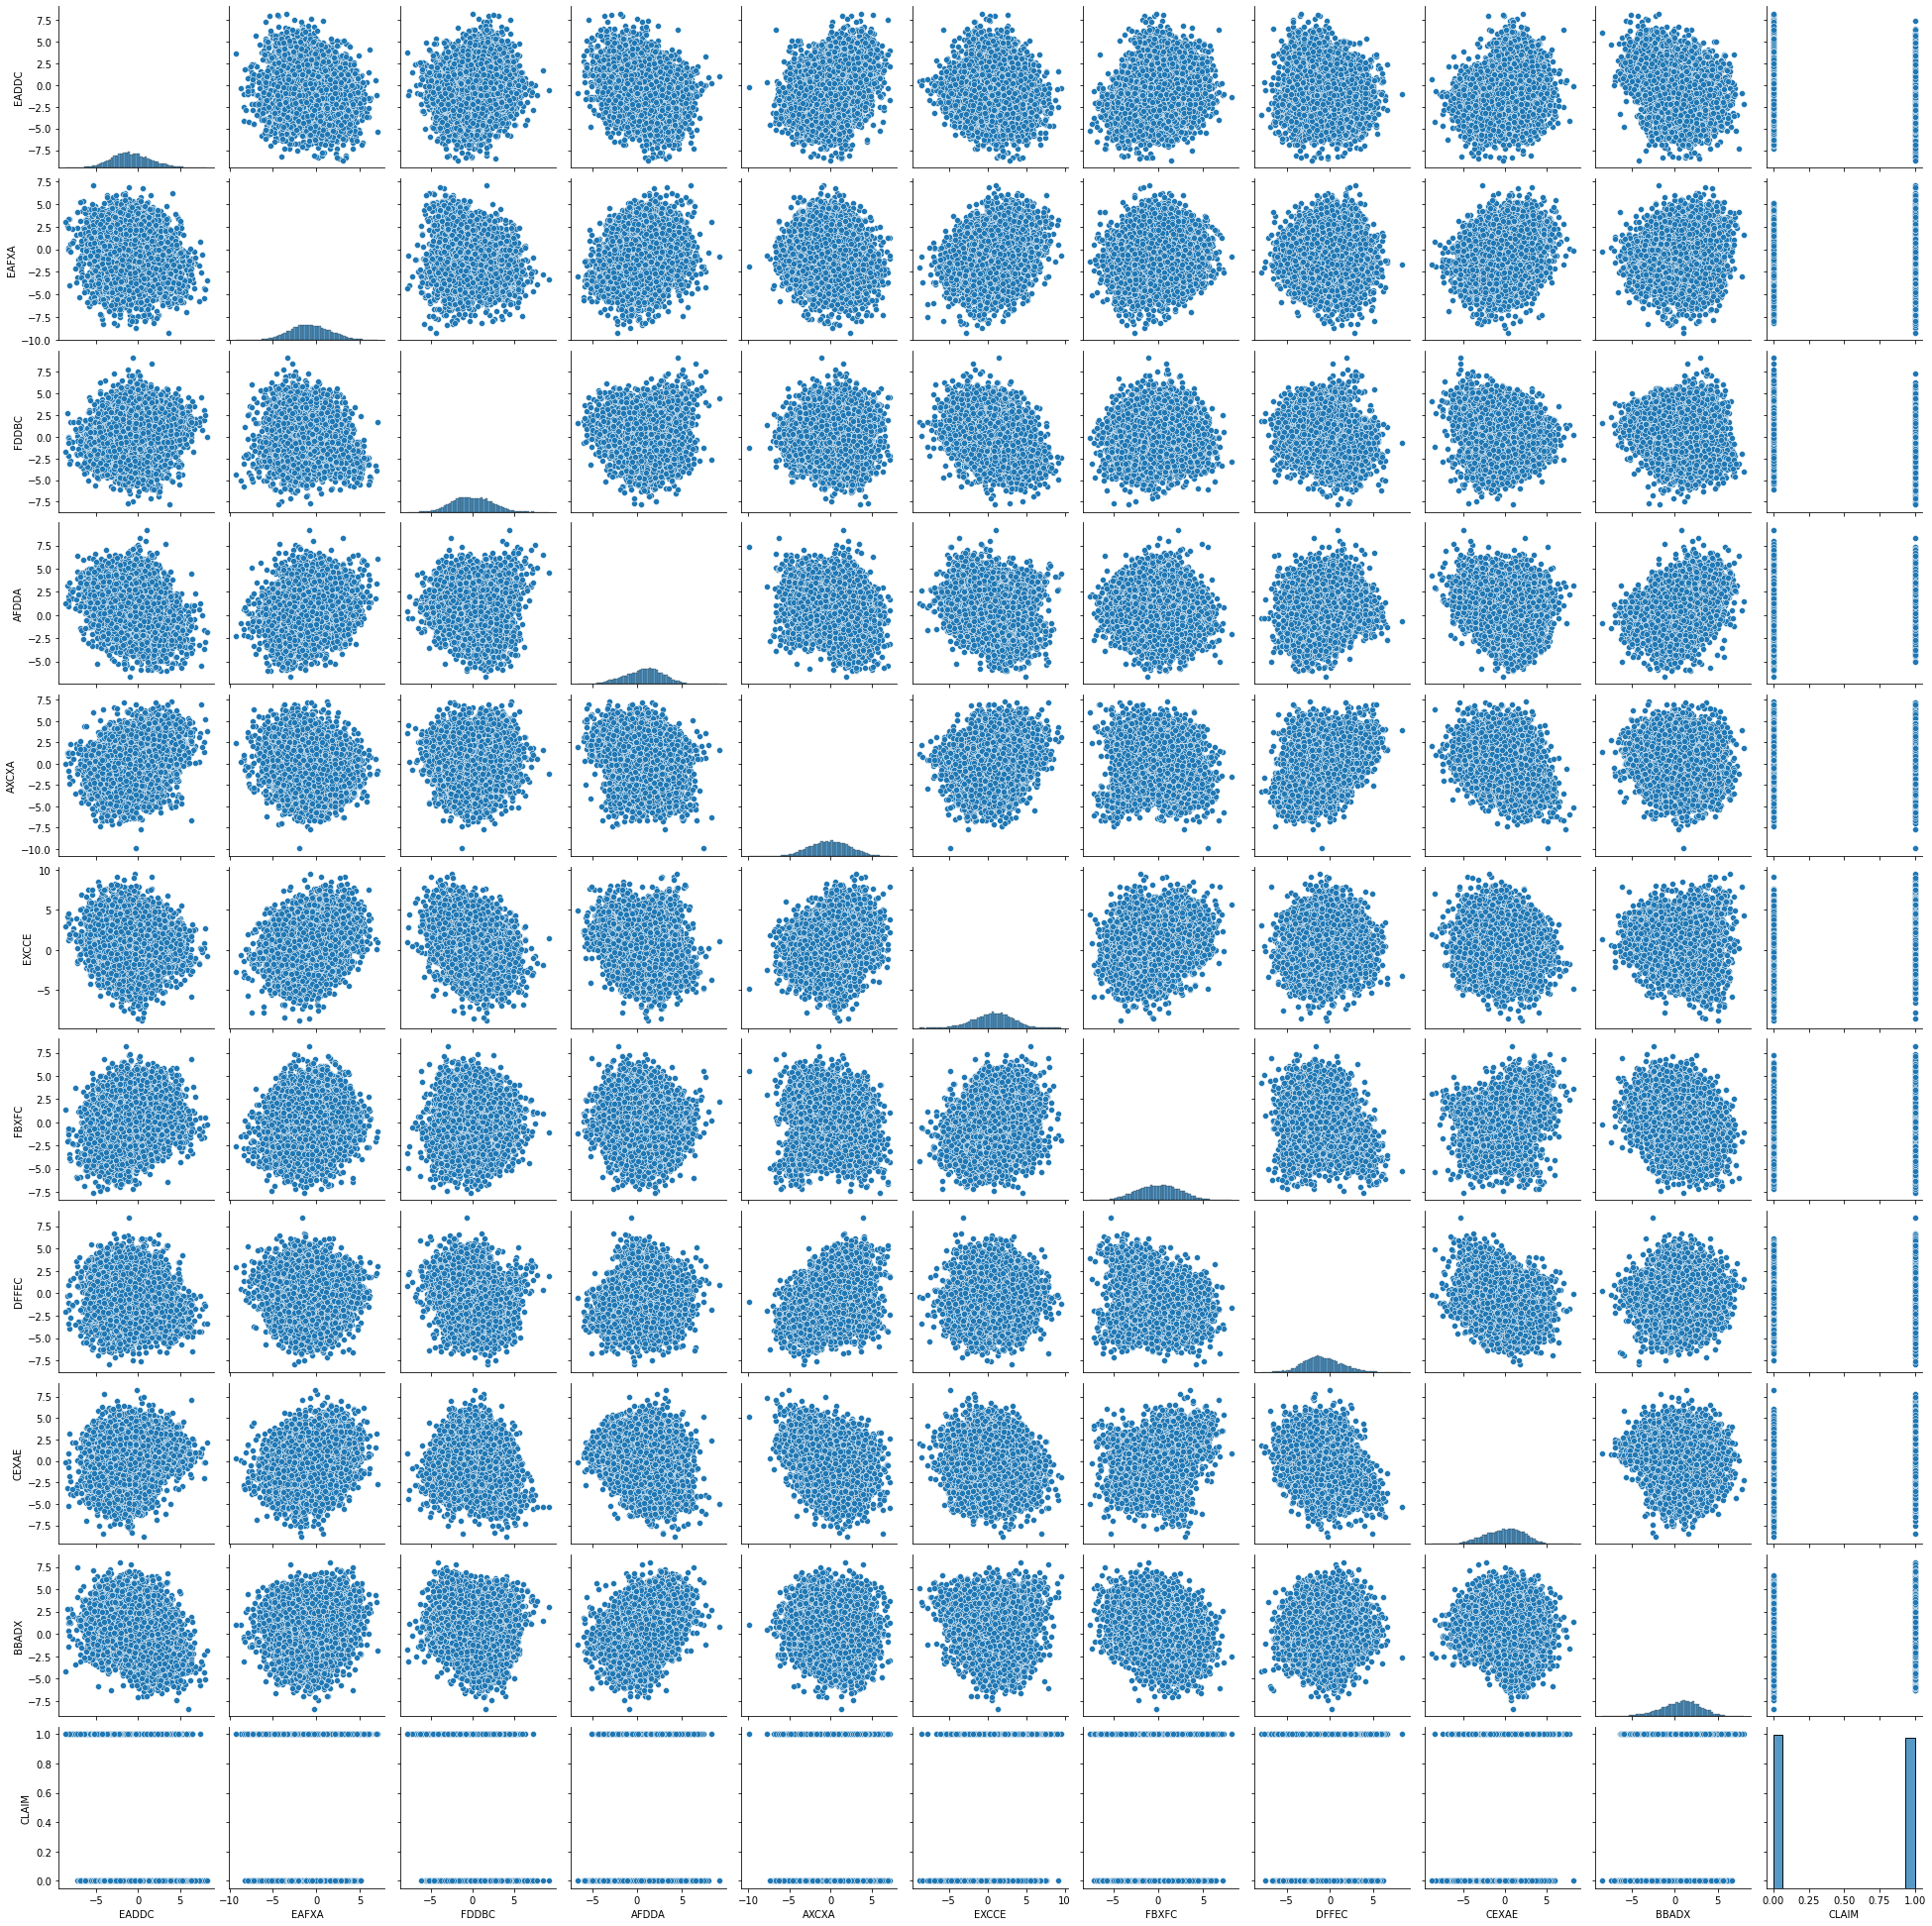

In [85]:
sns.pairplot(cP)

### Building a Logistic Regression Model
#### Creating Training data and Test data

In [86]:
y = cP['CLAIM']

x = cP.drop(['CLAIM'], axis=1)

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Training

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [88]:
print(model.coef_)

[[-0.16757787  0.05199192 -0.49561219  0.28081252  0.1177632   0.09854724
   0.07106041  0.19534789  0.18142198  0.16941155]]


In [89]:
print(model.intercept_)

[-0.37585018]


In [90]:
predictions = model.predict(x_test)

In [91]:
from sklearn.metrics import classification_report

classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           0       0.83      0.82      0.83      1515\n           1       0.82      0.83      0.82      1485\n\n    accuracy                           0.82      3000\n   macro avg       0.82      0.82      0.82      3000\nweighted avg       0.82      0.82      0.82      3000\n'